In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,f1_score,confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('spam.csv',encoding='"ISO-8859-1')
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df['v1'].value_counts()
df['labels'] = df['v1'].map({'ham':0,'spam':1})

C:\Users\DELL\.conda\envs\projects\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='v1', ylabel='count'>

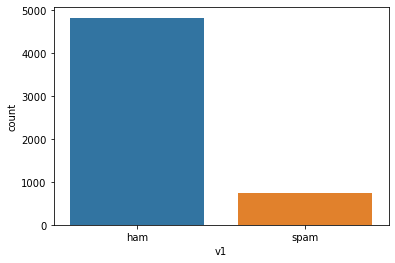

In [4]:
sns.countplot(df['v1'])

In [5]:
X = df['v2']
y = df['labels']
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: labels, Length: 5572, dtype: int64

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33)

In [7]:
featurizer = CountVectorizer()
Xtrain = featurizer.fit_transform(X_train)
Xtest  = featurizer.transform(X_test)

In [8]:
Xtest

<1839x6947 sparse matrix of type '<class 'numpy.int64'>'
	with 23009 stored elements in Compressed Sparse Row format>

In [9]:
model = MultinomialNB()
model.fit(Xtrain,y_train)
print('train acc ', model.score(Xtrain,y_train))
print('tes   acc ', model.score(Xtest,y_test))

train acc  0.994374497723011
tes   acc  0.9858618814573138


In [10]:
featurizer = TfidfVectorizer()
Xtrain = featurizer.fit_transform(X_train)
Xtest  = featurizer.transform(X_test)

In [11]:
model = MultinomialNB()
model.fit(Xtrain,y_train)
print('train acc ', model.score(Xtrain,y_train))
print('tes   acc ', model.score(Xtest,y_test))

train acc  0.97053308331101
tes   acc  0.9575856443719413


In [12]:
Ptrain = model.predict(Xtrain)
Ttest  = model.predict(Xtest)
print('F1 Score ' , f1_score(y_train,Ptrain))
print('F1 Score ' , f1_score(y_test,Ttest))

F1 Score  0.8747152619589977
F1 Score  0.8177570093457944


In [13]:
prob_train = model.predict_proba(Xtrain)[:,1]
prob_test  = model.predict_proba(Xtest)[:,1]
print('training auc ' , roc_auc_score(y_train,prob_train))
print('tes      auc ' , roc_auc_score(y_test,prob_test))

training auc  0.9940952435712027
tes      auc  0.9767730487616446


In [14]:
cm = confusion_matrix(y_train,Ptrain)
cm

array([[3239,    0],
       [ 110,  384]], dtype=int64)

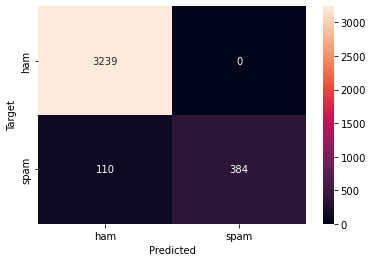

In [15]:
def plot_cm(cm):
    classes = ['ham','spam']
    df_cm = pd.DataFrame(cm,index=classes,columns=classes)
    ax = sns.heatmap(df_cm,annot=True,fmt='g')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Target')

plot_cm(cm)

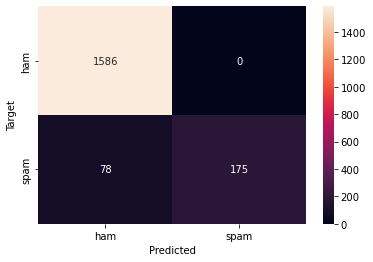

In [16]:
cm_test = confusion_matrix(y_test,Ttest)
plot_cm(cm_test)

In [17]:
def visualize(label):
    words = ''
    for msg in df[df['v1'] == label]['v2']:
        msg = msg.lower()
        words += msg + " "
    wordcloud = WordCloud(width=600,height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

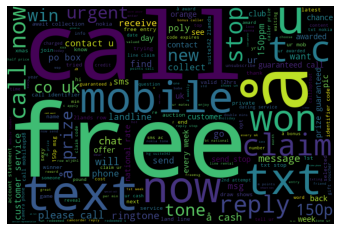

In [18]:
visualize('spam')

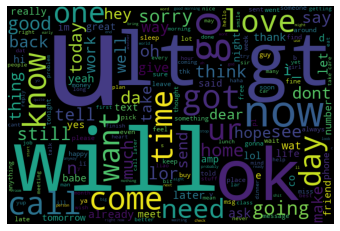

In [19]:
visualize('ham')

In [20]:
X = featurizer.transform(df['v2'])
df['predictions'] = model.predict(X)
df.head()

,v1,v2,labels,predictions
0,ham,"Go until jurong point, crazy.. Available only ...",0,0
1,ham,Ok lar... Joking wif u oni...,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,1
3,ham,U dun say so early hor... U c already then say...,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,0


In [21]:
# things that should be spam
sneaky_spam = df[ (df['predictions'] == 0) & (df['labels'] == 1)]['v2']
for msg in sneaky_spam:
    print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL
Thanks for your subscription to Ringtone UK your mobile will be charged å£5/month Please confirm by replying YES or NO. If you reply NO you will not be charged
SMS. ac Sptv: The New Jersey Devils and the Detroit Red Wings play Ice Hockey. Correct or Incorrect? End? Reply END SPTV
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
You'll not rcv any more msgs from the chat svc. For FREE Hardcore services text GO to: 69988 If u get nothing u must Age Verify with yr network & try again
-PLS STOP bootydelious (32/F) is inviting you to be her friend. Reply YES-434 or NO-434 See her: www.SMS.ac/u/bootydelious STOP? Send STOP FRND to 62468
BangBabes Ur order is on the w

In [23]:
# things that should be spam
not_spam = df[ (df['predictions'] == 1) & (df['labels'] == 0)]['v2']
for msg in not_spam:
    print(msg)